In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
# Load data
data = pd.read_csv('D:/ML MINI PROJECT/NFLX.csv')
data.head()
# Preprocess data (e.g., handle missing values, normalize)
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select relevant features
features = ['Open', 'High', 'Low' , 'Volume']
data = data[features+['Close']]

# Normalize data
data = (data - data.mean()) / data.std()


In [26]:
# Features and target
X = data[features]
y = data['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)


SVR()

Mean Squared Error (MSE): 0.0047879931539234
Mean Absolute Error (MAE): 0.0427420108620727
Root Mean Squared Error (RMSE): 0.06919532609882982
R-squared (R²): 0.995184632024375


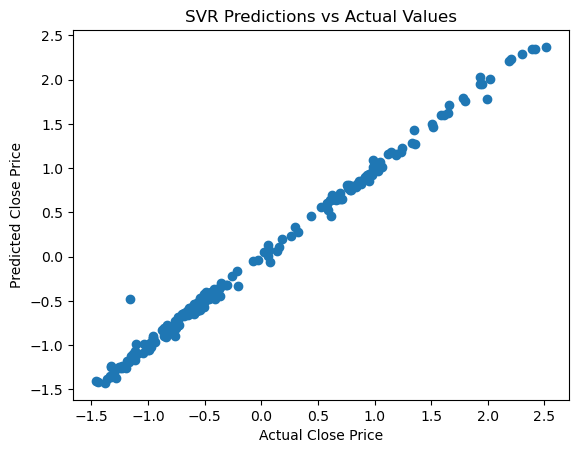

In [28]:
# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('SVR Predictions vs Actual Values')
plt.show()


In [38]:
# Example: Predict stock price for the next day
next_day = pd.DataFrame([[100, 100, 250, 1500003]], columns=['Open', 'High', 'Low', 'Volume'])
predicted_price = svr.predict(next_day)
print(f"Predicted Stock Price: {predicted_price[0]}")


Predicted Stock Price: 0.20645670499602015
